In [1]:
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import random

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from xgboost import plot_importance

In [4]:
filename = "For_modeling.csv"
df = pd.read_csv(filename, index_col=0 )

C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [6]:
df.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
df.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,...,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06,9.577233e+06
mean,2.577357e+01,3.710770e+03,3.754762e+01,1.269908e+02,3.754771e+01,1.269907e+02,1.873683e+00,7.578348e+00,1.577210e+01,1.437253e+01,...,3.000033e+01,2.947619e+00,1.855619e+01,1.788056e-02,1.818972e+00,5.399970e+01,7.298986e-01,9.965561e-03,2.071965e+01,3.245480e+01
std,2.501600e+01,3.954247e+03,4.442177e-02,8.256880e-02,4.446095e-02,8.323662e-02,1.996098e+00,2.697368e+00,8.748874e+00,6.252883e+00,...,1.731384e+01,1.977259e+00,9.502919e+00,3.739918e-01,9.709766e-01,1.742409e+01,9.179789e-01,1.629318e-01,1.265968e+01,2.407147e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.783247e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754707e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.258996e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.367425e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [9]:
df=df.drop(['Temp'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9577233 entries, 0 to 9830310
Data columns (total 24 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Precip      float64
 18  Wind        float64
 19  Humid       float64
 20  Solar       float64
 21  Snow        float64
 22  GroundTemp  float64
 23  Dust        float64
dtypes: float64(12), int64(12)
memory usage: 1.8 GB


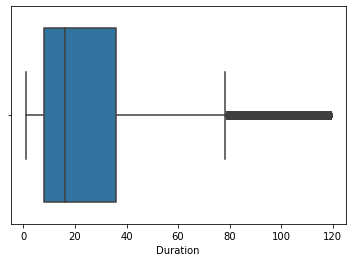

In [11]:
sns.boxplot(x=df['Duration'])

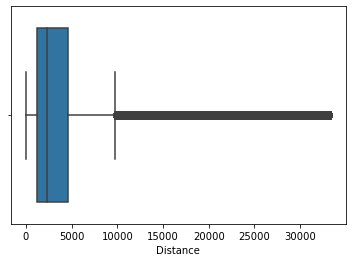

In [12]:
sns.boxplot(x=df['Distance'])

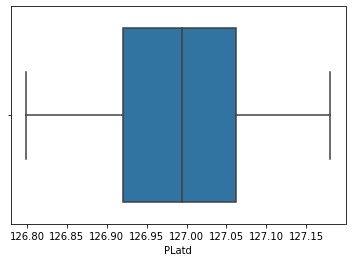

In [13]:
sns.boxplot(x=df['PLatd'])

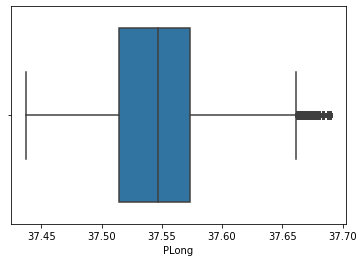

In [14]:
sns.boxplot(x=df['PLong'])

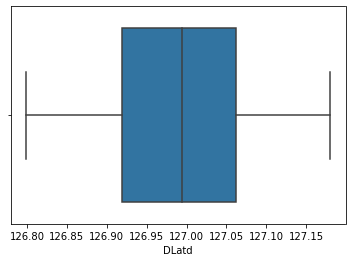

In [15]:
sns.boxplot(x=df['DLatd'])

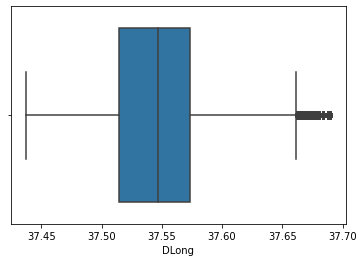

In [16]:
sns.boxplot(x=df['DLong'])

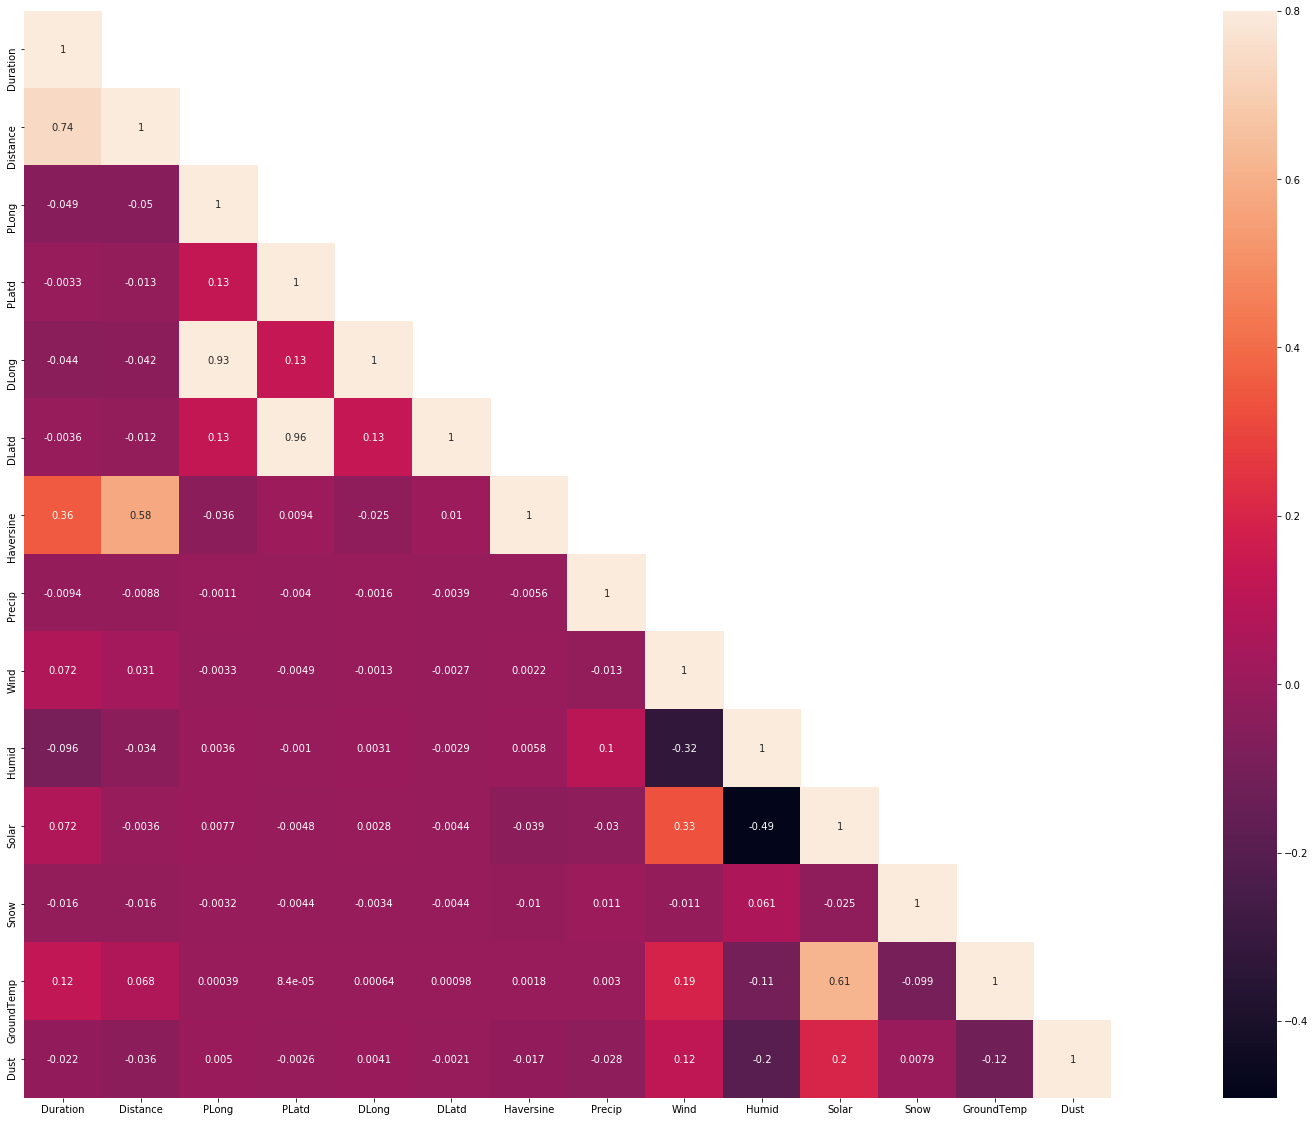

In [17]:
corrMatt = df[['Duration', 'Distance', 
                     'PLong', 'PLatd',
                     'DLong', 'DLatd', 
                     'Haversine',  'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(40,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [18]:
# Count number of pickups made per month, day of week and hour of day
month_usage = pd.value_counts(df['Pmonth']).sort_index()
dow_usage = pd.value_counts(df['PDweek']).sort_index()
hour_usage = pd.value_counts(df['Phour']).sort_index()

There were a total of 9577233 Rental Bike pickups made


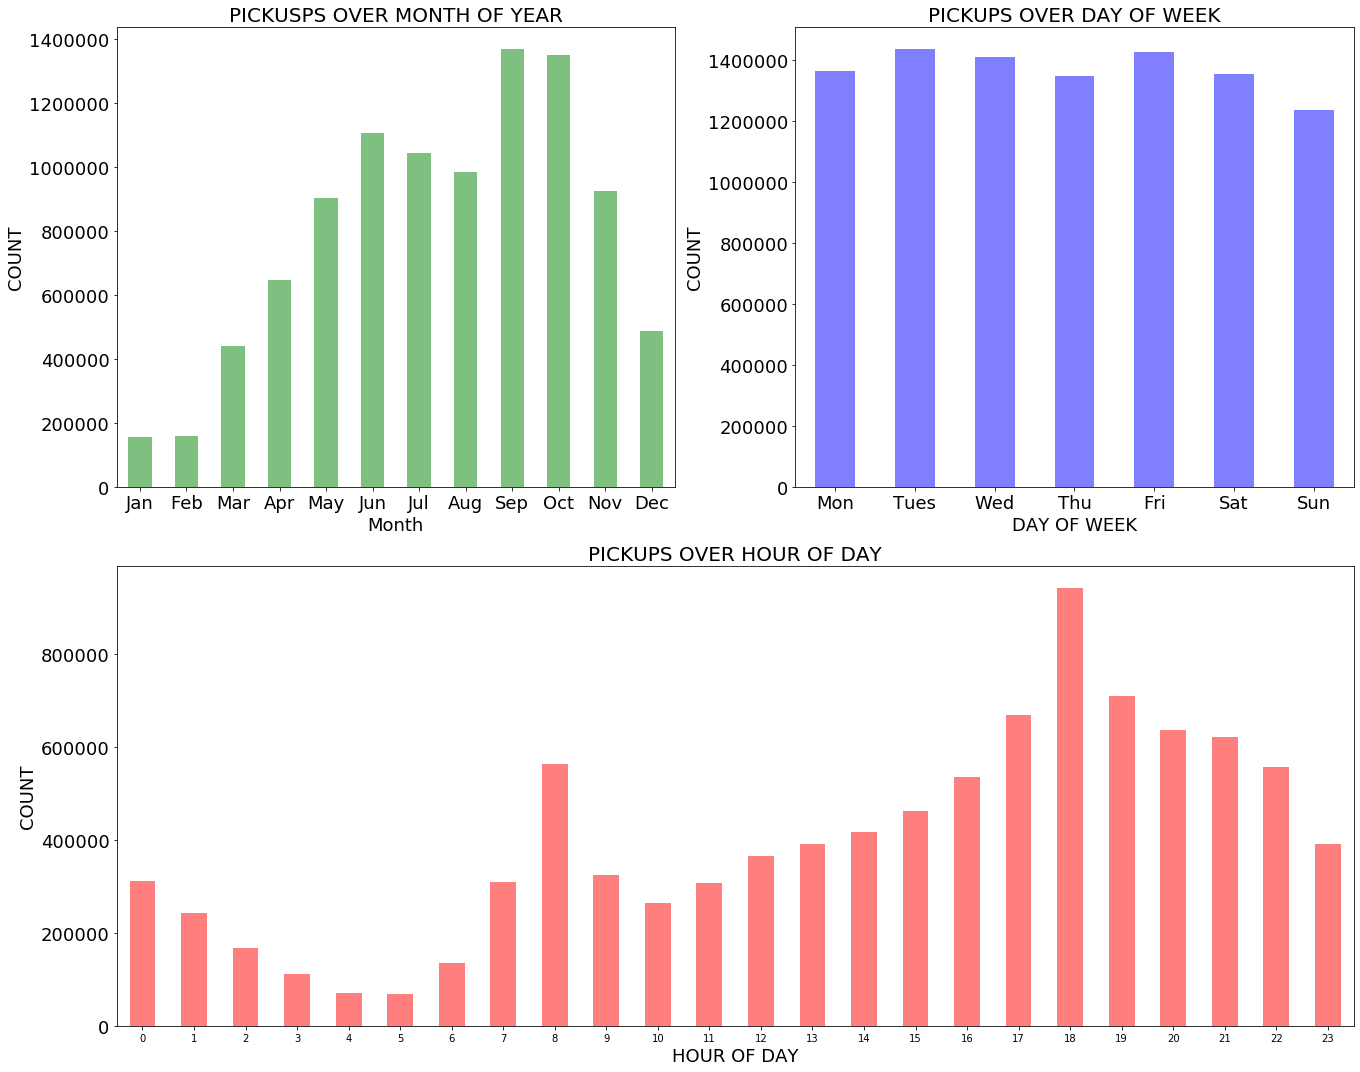

In [19]:
x_tick_labels_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_tick_labels_day = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# define subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(19, 15))

figure = plt.subplot(2, 2, 1)
month_usage.plot.bar(alpha = 0.5, color = 'green')
plt.title('PICKUSPS OVER MONTH OF YEAR', fontsize = 20)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(month_usage.index - 1, x_tick_labels_month, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)
plt.xticks(month_usage.index - 1, x_tick_labels_month, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 2, 2)
dow_usage.plot.bar(alpha = 0.5, color = 'blue')
plt.title('PICKUPS OVER DAY OF WEEK', fontsize = 20)
plt.xlabel('DAY OF WEEK', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(dow_usage.index, x_tick_labels_day, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 1, 2)
hour_usage.plot.bar(alpha = 0.5, color = 'red')
plt.title('PICKUPS OVER HOUR OF DAY', fontsize = 20)
plt.xlabel('HOUR OF DAY', fontsize = 18)
plt.ylabel('COUNT', fontsize = 18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

fig.tight_layout()
# print the total number of Taxi pickups
print ("There were a total of %d Rental Bike pickups made" % (len(df)))

September has the most pickups followed by october. 
Tuesday and Fridays have the most pickups. 
Most pickups were made around 6:00 PM. 

January and February has the least pickups. 
All weekdays have more or less equal number of pickups. 
4:00 and 5:00 AM is the least popular time for pickups. 


Text(0.5, 1.0, 'PICKUP HOURS DISTRIBUTION')

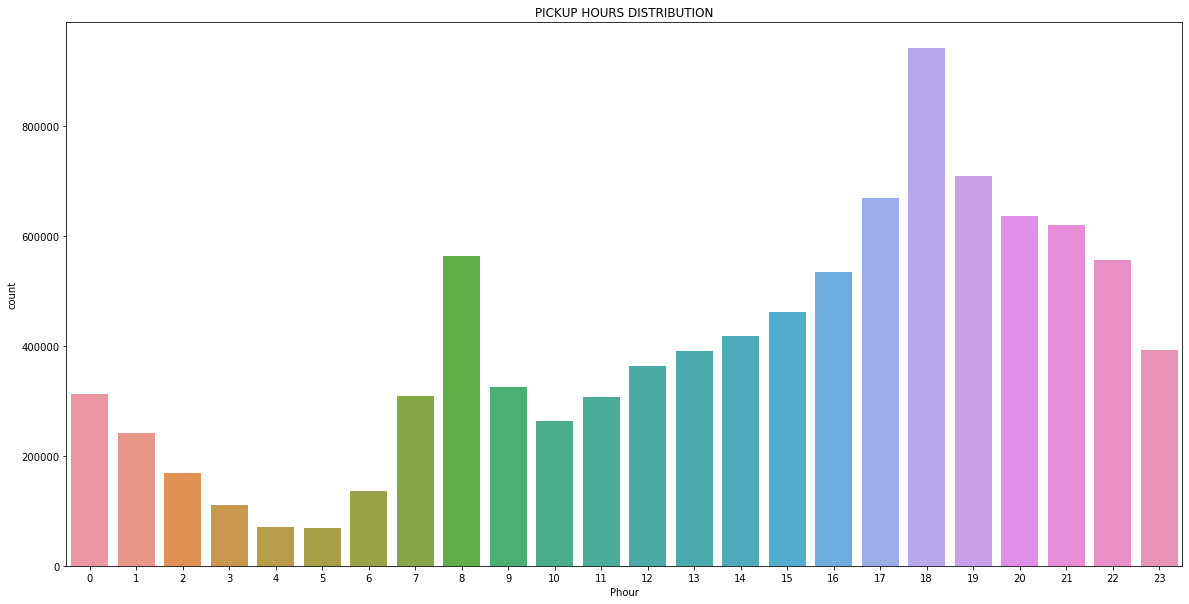

In [20]:
#Which hours are pickup and dropoff higher?

plt.figure(figsize=(20,10))
sns.countplot(x=df['Phour']).set_title("PICKUP HOURS DISTRIBUTION")

Text(0.5, 1.0, 'DROPOFF HOURS DISTRIBUTION')

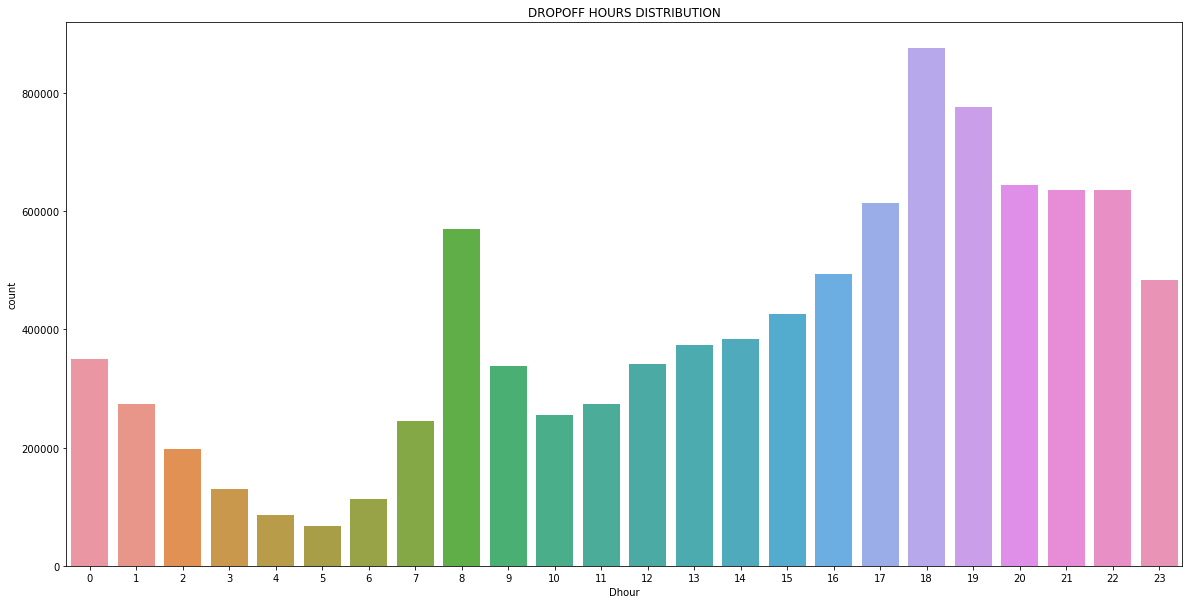

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Dhour']).set_title("DROPOFF HOURS DISTRIBUTION")

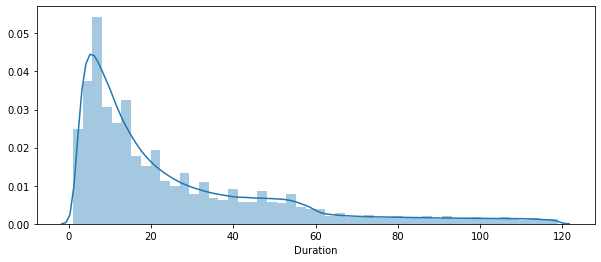

In [22]:
plt.subplots(figsize=(10,4))
sns.distplot(df['Duration'], hist=True, kde=True)

Text(0.5, 1.0, 'DROPOFF')

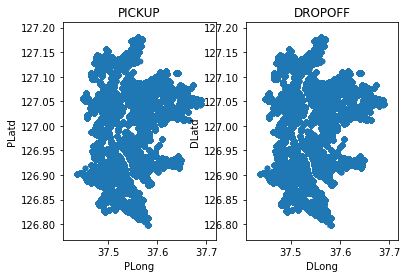

In [23]:
f, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1)

df.plot(kind='scatter', x='PLong', y='PLatd', ax=ax1, alpha=0.25)
ax1.set_title('PICKUP')
df.plot(kind='scatter', x='DLong', y='DLatd', ax=ax2, alpha=0.25)
ax2.set_title('DROPOFF')

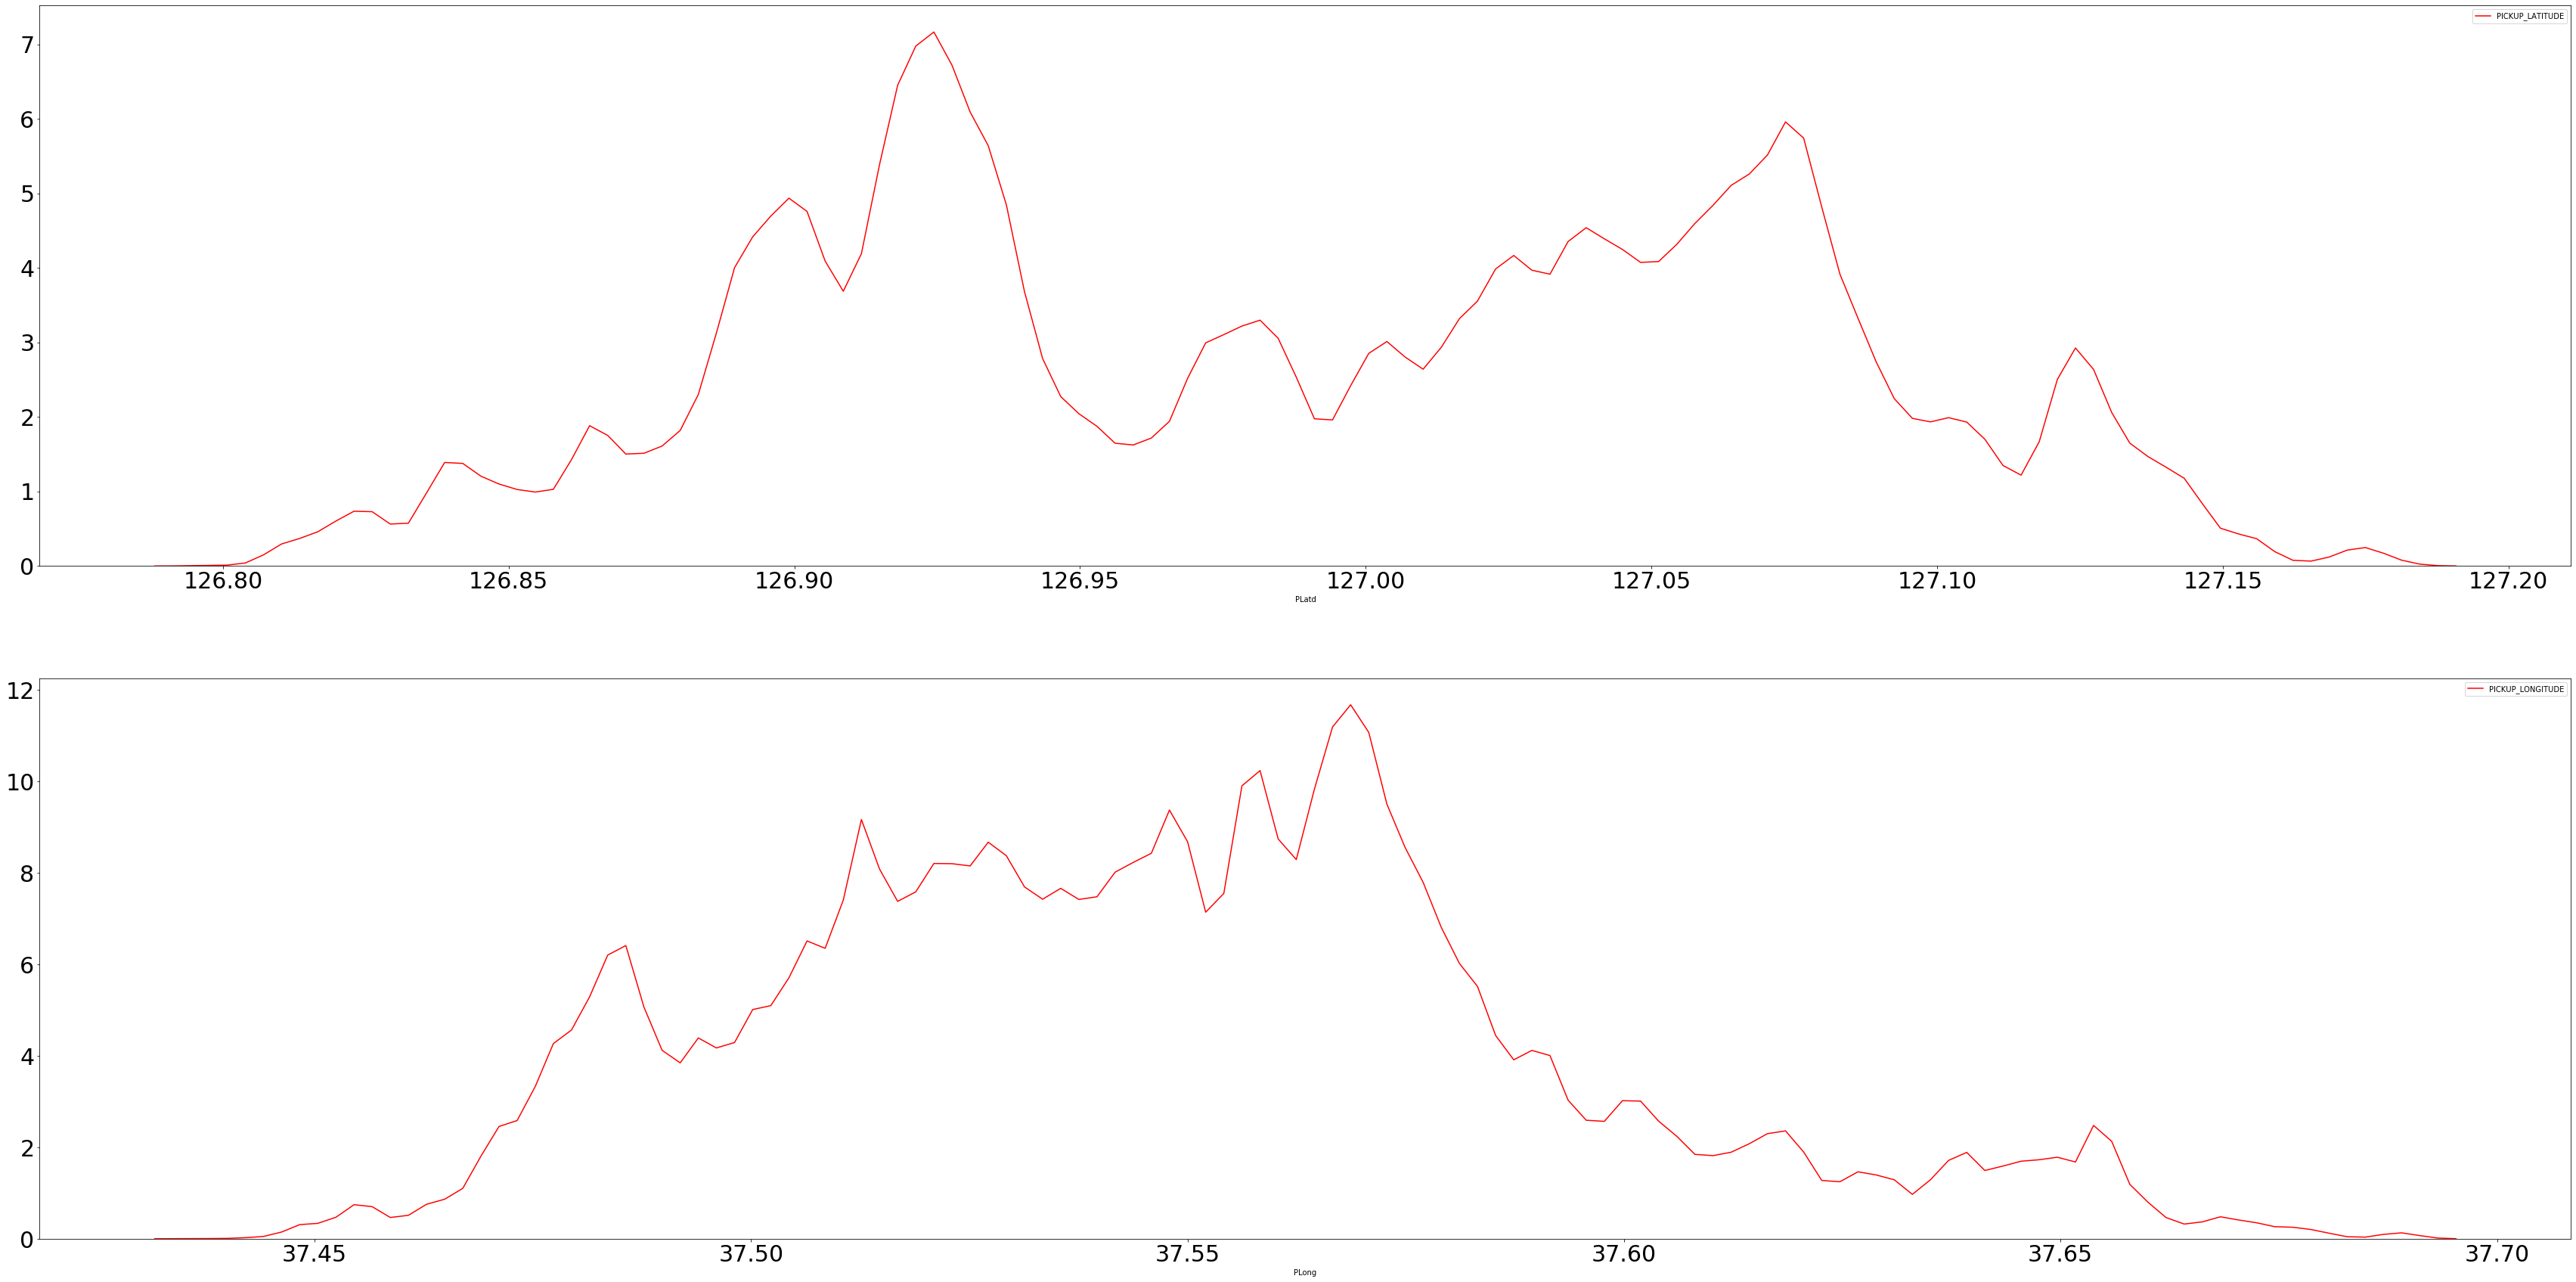

In [24]:
f, axes = plt.subplots(2,figsize=(60, 30), sharex=False, sharey = False)
sns.distplot(df['PLatd'], label = 'PICKUP_LATITUDE',color="r",bins = 100, ax=axes[0], hist=False).tick_params(labelsize=30)
sns.distplot(df['PLong'], label = 'PICKUP_LONGITUDE',color="r",bins =100, ax=axes[1], hist=False).tick_params(labelsize=30)

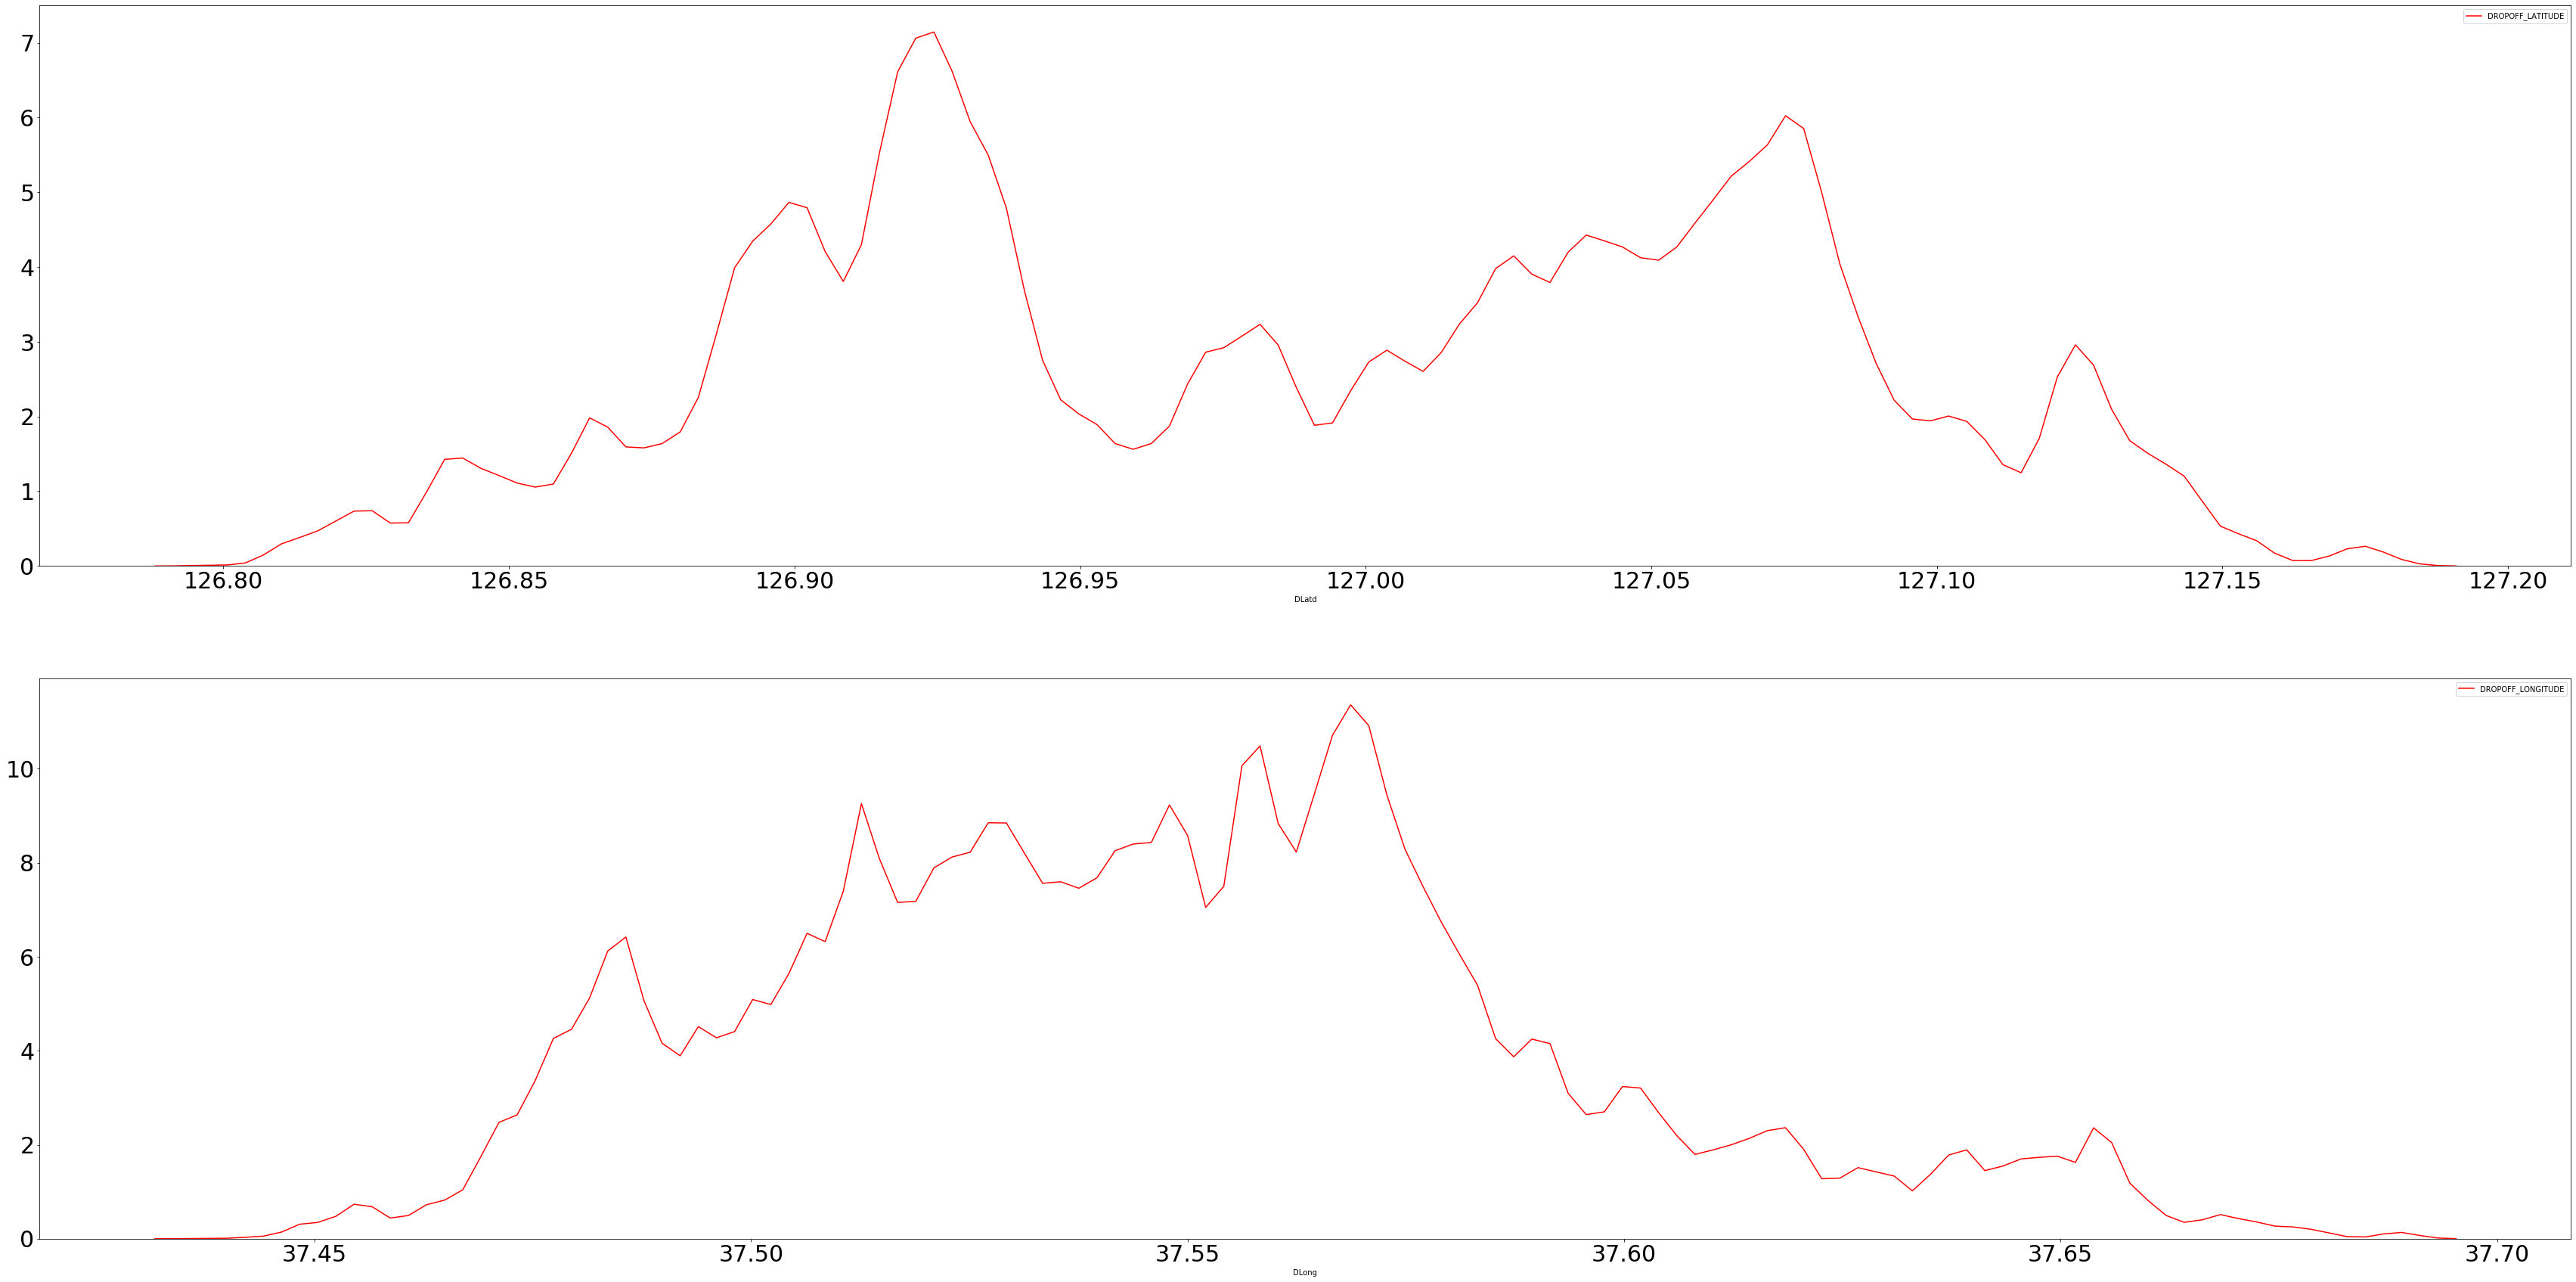

In [25]:
f, axes = plt.subplots(2,figsize=(60, 30), sharex=False, sharey = False)
sns.distplot(df['DLatd'], label = 'DROPOFF_LATITUDE',color="r",bins = 100, ax=axes[0], hist=False).tick_params(labelsize=30)
sns.distplot(df['DLong'], label = 'DROPOFF_LONGITUDE',color="r",bins =100, ax=axes[1], hist=False).tick_params(labelsize=30)

[Text(0, 0.5, 'TRIP DURATION'), Text(0.5, 1.0, 'Box Plot On Trip Duration')]

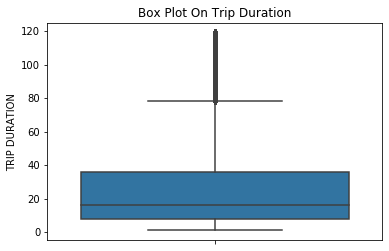

In [26]:
ax = sns.boxplot(data=df,y="Duration",orient="v")
ax.set(ylabel='TRIP DURATION',title="Box Plot On Trip Duration")

[Text(0, 0.5, 'TRIP_DURATION'),
 Text(0.5, 0, 'MONTH'),
 Text(0.5, 1.0, 'Box Plot On Trip duration Across Month of the year')]

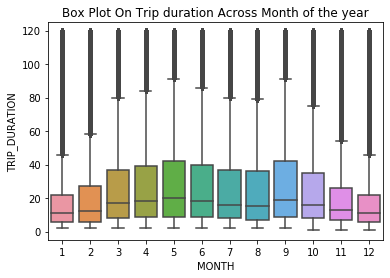

In [27]:
ax=sns.boxplot(data=df,y="Duration",x="Pmonth",orient="v")
ax.set(xlabel='MONTH', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Month of the year")

[Text(0, 0.5, 'TRIP_DURATION'),
 Text(0.5, 0, 'DAY OF THE WEEK'),
 Text(0.5, 1.0, 'Box Plot On Trip duration Across Day of the Week')]

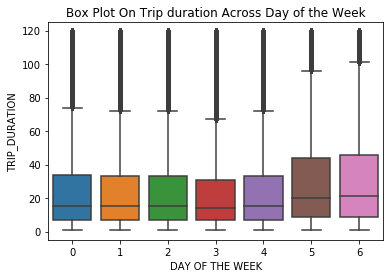

In [28]:
ax=sns.boxplot(data=df,y="Duration",x="PDweek",orient="v")
ax.set(xlabel='DAY OF THE WEEK', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Day of the Week")

All weeks are more or less have equal distribution. 
Although Saturday and Sunday seems to have a little more distribution than rest of the weekdays 

[Text(0, 0.5, 'TRIP_DURATION'),
 Text(0.5, 0, 'HOUR OF THE DAY'),
 Text(0.5, 1.0, 'Box Plot On Trip Duration Across Hour of the Day')]

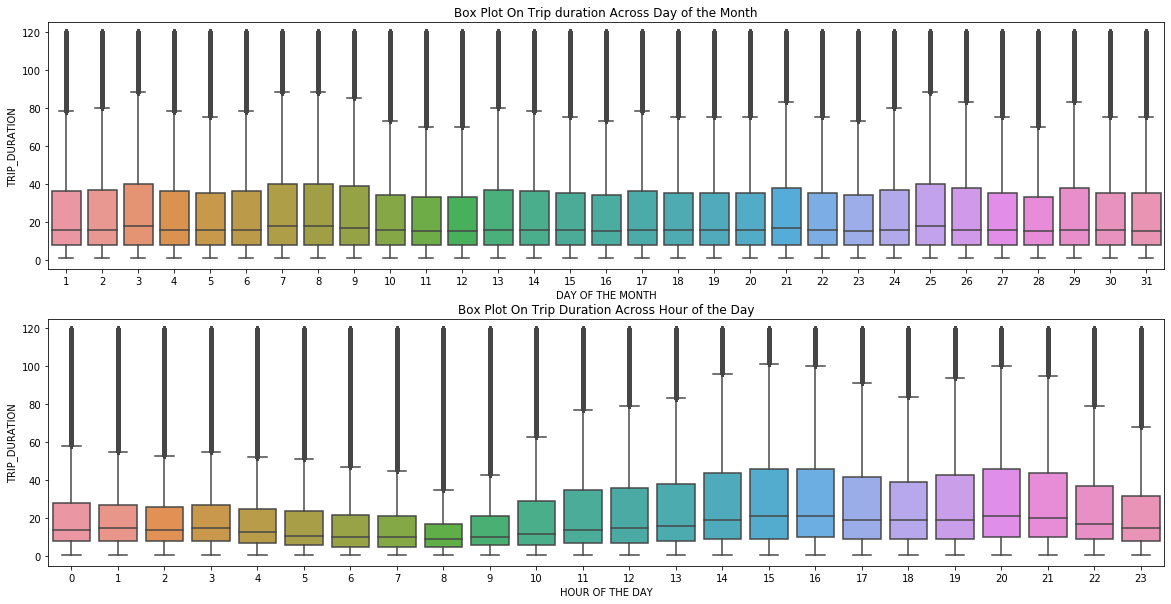

In [29]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=df,y="Duration",x="Pday",orient="v",ax=axes[0])
sns.boxplot(data=df,y="Duration",x="Phour",orient="v",ax=axes[1])

axes[0].set(xlabel='DAY OF THE MONTH', ylabel='TRIP_DURATION',title="Box Plot On Trip duration Across Day of the Month")
axes[1].set(xlabel='HOUR OF THE DAY', ylabel='TRIP_DURATION',title="Box Plot On Trip Duration Across Hour of the Day")

All days of the month have equal distribution 

In [31]:
# check xgboost version
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [32]:
x = df.drop('Duration',axis = 1)

In [33]:
y=df.Duration

In [34]:
train_X, test_X, train_y, test_y = train_test_split(x, y,test_size = 0.3, random_state = 123)

In [35]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 123)

In [36]:
xgb_r.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

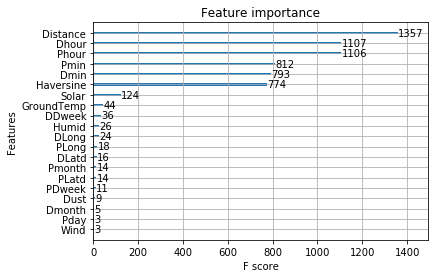

<Figure size 1152x864 with 0 Axes>

In [37]:
xg.plot_importance(xgb_r)
plt.figure(figsize = (16, 12))
plt.show()

In [38]:
pred = xgb_r.predict(test_X)

In [39]:
rmse = np.sqrt(MSE(test_y, pred))

In [40]:
print("RMSE : % f" %(rmse))

RMSE :  5.572397


In [41]:
r2 = r2_score(test_y,pred)
print(r2)

0.950368265158864


Note: XGBoost don't necessarily require cross validation so we may skip that for this project however, Cross validation 
is a necessary step in GBM and other sensitive algorithms. 

From the feature importance graph we gained that Distance, Phour, Dhour, Dmin, Pmin, Solar, haversine, GroundTemp are
determining features. 
We have noted that bike demand is specifically prominent at 6:00 PM and the demand goes down during winters when radiation is low.


We may go ahead and drop other features and again train and save our model. 